# Machine Learning with Python

This notebook was built as part of the IBM Data Sciences Pro Certificate Program where the learner was tasked to build a classifier used to predict whether a loan will be paid off or not.  The use case is to load a historical dataset from previous loan applications, clean the data, and apply different classification algorithm on the data. The following algorithms were used to build the models:
<br>
* <a href="https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm">k-Nearest Neighbors (k-NN)</a>
* <a href="https://en.wikipedia.org/wiki/Decision_tree_learning">Decision Tree Learning</a>
* <a href="https://en.wikipedia.org/wiki/Support_vector_machine">Support Vector Machine</a>
* <a href="https://en.wikipedia.org/wiki/Logistic_regression">Logistic Regression</a>


The accuracy of each classifier is reported using the following metrics when these are applicable:
<br>
* <a href="https://en.wikipedia.org/wiki/Jaccard_index">Jaccard Index</a>
* <a href="https://en.wikipedia.org/wiki/F1_score">F1-score</a>
* <a href="https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression">Logistic Loss (LogLoss)</a>

In [260]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [261]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-09-22 06:46:11--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2020-09-22 06:46:11 (10.9 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [262]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [263]:
df.shape


(346, 10)

In [264]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

### Convert to date time object 

In [265]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [266]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [267]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

# All requested packages already installed.



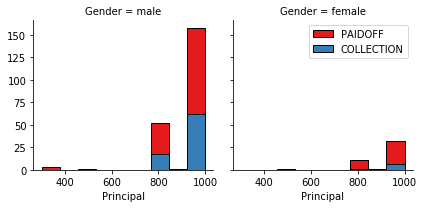

In [268]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

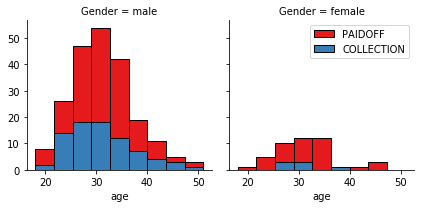

In [269]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

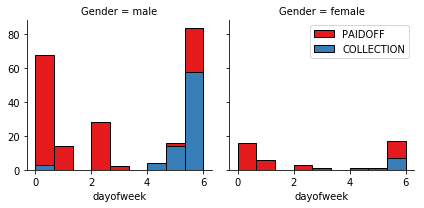

In [270]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [271]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [272]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [274]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [275]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature before One Hot Encoding

In [276]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to convert categorical varables to binary variables and append them to the feature Data Frame 

In [277]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [278]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?

In [279]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [280]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [281]:
# Setup data for all models
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train Set:', X_train.shape,  y_train.shape)
print ('Test Set:', X_test.shape,  y_test.shape)

Train Set: (276, 8) (276,)
Test Set: (70, 8) (70,)


In [282]:
# Build and train a K Nearest Neighbor Classifier, determine number of neighbors to use
Ks = 12
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1, Ks):
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.67142857, 0.65714286, 0.71428571, 0.68571429, 0.75714286,
       0.71428571, 0.78571429, 0.75714286, 0.75714286, 0.67142857,
       0.7       ])

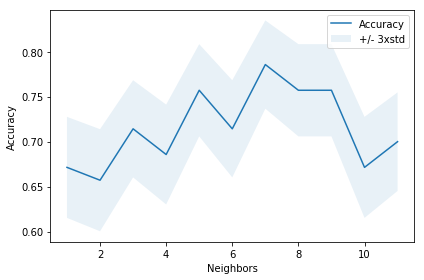

The best accuracy 0.7857142857142857 with k= 7


In [283]:
# Plot model accuracy
plt.plot(range(1, Ks), mean_acc)
plt.fill_between(range(1, Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Neighbors')
plt.tight_layout()
plt.show()

neigh = KNeighborsClassifier(n_neighbors=mean_acc.argmax()+1).fit(X_train, y_train)
print( "The best accuracy", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

In [284]:
# Use k=7 as indicated by the plot
k = 7
loan_knn = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
yhat = loan_knn.predict(X_test)
yhat[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [285]:
# Summary
print("Train Set Accuracy: ", metrics.accuracy_score(y_train, loan_knn.predict(X_train)))
print("Test Set Accuracy: ", metrics.accuracy_score(y_test, yhat))
print (classification_report(y_test, yhat))

Train Set Accuracy:  0.8079710144927537
Test Set Accuracy:  0.7857142857142857
              precision    recall  f1-score   support

  COLLECTION       0.50      0.40      0.44        15
     PAIDOFF       0.84      0.89      0.87        55

   micro avg       0.79      0.79      0.79        70
   macro avg       0.67      0.65      0.66        70
weighted avg       0.77      0.79      0.78        70



In [286]:
f1_score(y_test, yhat, average='weighted')

0.7766540244416351

In [287]:
jaccard_similarity_score(y_test, yhat)

0.7857142857142857

# Decision Tree

In [288]:
# Build and train a Decision Tree Classifier, determine maximum depth to use
md = 10
mean_acc = np.zeros((md-1))
std_acc = np.zeros((md-1))

for n in range(1,md):  
    loan_dt = DecisionTreeClassifier(criterion="entropy", max_depth = n).fit(X_train, y_train)
    yhat = loan_dt.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat == y_test) / np.sqrt(yhat.shape[0])
mean_acc

array([0.78571429, 0.78571429, 0.61428571, 0.61428571, 0.64285714,
       0.77142857, 0.75714286, 0.75714286, 0.65714286])

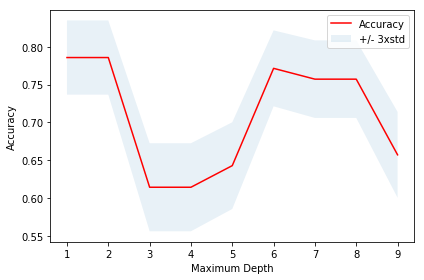

In [289]:
# Plot model accuracy
plt.plot(range(1,md), mean_acc, 'r')
plt.fill_between(range(1,md), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Maximum Depth')
plt.tight_layout()
plt.show()

In [294]:
#Build decision tree with max depth of 6 based on the plot
loan_dt = DecisionTreeClassifier(criterion="entropy", max_depth = 6) 
loan_dt.fit(X_train, y_train)
yhat= loan_dt.predict(X_test)

In [295]:
# Summary
print("Train Set Accuracy: ", metrics.accuracy_score(y_train, loan_dt.predict(X_train)))
print("Test Set Accuracy: ", metrics.accuracy_score(y_test, yhat))
print (classification_report(y_test, yhat))

Train Set Accuracy:  0.7753623188405797
Test Set Accuracy:  0.7714285714285715
              precision    recall  f1-score   support

  COLLECTION       0.33      0.07      0.11        15
     PAIDOFF       0.79      0.96      0.87        55

   micro avg       0.77      0.77      0.77        70
   macro avg       0.56      0.52      0.49        70
weighted avg       0.69      0.77      0.71        70



In [296]:
f1_score(y_test, yhat, average='weighted')

0.7064793130366899

In [297]:
jaccard_similarity_score(y_test, yhat)

0.7714285714285715

# Support Vector Machine

In [298]:
# Build and train a SVM Classifier for each kernel to determine the best one
svm1 = svm.SVC(kernel='rbf', gamma='auto').fit(X_train, y_train)
yhat1 = svm1.predict(X_test)
svm_r = metrics.accuracy_score(y_test, yhat1)

svm2 = svm.SVC(kernel='linear', gamma='auto').fit(X_train, y_train)
yhat2 = svm2.predict(X_test)
svm_l = metrics.accuracy_score(y_test, yhat2)
    
svm3 = svm.SVC(kernel='poly', gamma='auto').fit(X_train, y_train)
yhat3 = svm3.predict(X_test)
svm_p = metrics.accuracy_score(y_test, yhat3)

svm4 = svm.SVC(kernel='sigmoid', gamma='auto').fit(X_train, y_train)
yhat4 = svm4.predict(X_test)
svm_s = metrics.accuracy_score(y_test, yhat4)

print(svm_r, svm_l, svm_p, svm_s)

0.7428571428571429 0.7857142857142857 0.7714285714285715 0.7428571428571429


In [299]:
# Check for missing labels 
print("Rbf kernel ",set(y_test) - set(yhat1))
print("Linear ",set(y_test) - set(yhat2))
print("Polynomial kernel",set(y_test) - set(yhat3))
print("Sigmoid kernel",set(y_test) - set(yhat4))

Rbf kernel  set()
Linear  {'COLLECTION'}
Polynomial kernel set()
Sigmoid kernel set()


In [300]:
# Radial base function and sigmoid kernel were equal, others not good.  Use RBF
loan_svm = svm.SVC(kernel='rbf', gamma='auto').fit(X_train, y_train)
yhat = loan_svm.predict(X_test)
yhat [0:5]

array(['COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [301]:
# Summary
print("Train Set Accuracy: ", metrics.accuracy_score(y_train, loan_svm.predict(X_train)))
print("Test Set Accuracy: ", metrics.accuracy_score(y_test, yhat))
print (classification_report(y_test, yhat))

Train Set Accuracy:  0.782608695652174
Test Set Accuracy:  0.7428571428571429
              precision    recall  f1-score   support

  COLLECTION       0.36      0.27      0.31        15
     PAIDOFF       0.81      0.87      0.84        55

   micro avg       0.74      0.74      0.74        70
   macro avg       0.59      0.57      0.57        70
weighted avg       0.72      0.74      0.73        70



In [302]:
f1_score(y_test, yhat, average='weighted')

0.7275882012724117

In [303]:
jaccard_similarity_score(y_test, yhat)

0.7428571428571429

# Logistic Regression

In [304]:
# Build and train a Logistic Regression Classifier for each solver to determine the best one
lr1 = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat1 = lr1.predict(X_test)
lr_a1 = metrics.accuracy_score(y_test, yhat1)

lr2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
yhat2 = lr2.predict(X_test)
lr_a2 = metrics.accuracy_score(y_test, yhat2)

lr3 = LogisticRegression(C=0.01, solver='saga').fit(X_train,y_train)
yhat3 = lr3.predict(X_test)
lr_a3 = metrics.accuracy_score(y_test, yhat3)

lr4 = LogisticRegression(C=0.01, solver='newton-cg').fit(X_train,y_train)
yhat4 = lr4.predict(X_test)
lr_a4 = metrics.accuracy_score(y_test, yhat4)

lr5 = LogisticRegression(C=0.01, solver='lbfgs').fit(X_train,y_train)
yhat5 = lr5.predict(X_test)
lr_a5 = metrics.accuracy_score(y_test, yhat5)

print('Liblinear Accuracy:', lr_a1)
print('Sag Accuracy:', lr_a2)
print('Saga Accuracy:', lr_a3)
print('Newton-cg Accuracy:', lr_a4)
print('Lbfgs  Accuracy:', lr_a5)

Liblinear Accuracy: 0.6857142857142857
Sag Accuracy: 0.7857142857142857
Saga Accuracy: 0.7857142857142857
Newton-cg Accuracy: 0.7857142857142857
Lbfgs  Accuracy: 0.7857142857142857


In [305]:
# Check for missing labels 
print("Liblinear ", set(y_test) - set(yhat1))
print("Sag ", set(y_test) - set(yhat2))
print("Saga ", set(y_test) - set(yhat3))
print("Newton-cg ", set(y_test) - set(yhat4))
print("Lbfgs ", set(y_test) - set(yhat5))

Liblinear  set()
Sag  {'COLLECTION'}
Saga  {'COLLECTION'}
Newton-cg  {'COLLECTION'}
Lbfgs  {'COLLECTION'}


In [306]:
# Liblinear is the only solver with no label missing, use that
loan_lr = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
yhat = loan_lr.predict(X_test)

In [307]:
# Summary
print("Train Set Accuracy: ", metrics.accuracy_score(y_train, loan_lr.predict(X_train)))
print("Test Set Accuracy: ", metrics.accuracy_score(y_test, yhat))
print (classification_report(y_test, yhat))

Train Set Accuracy:  0.7572463768115942
Test Set Accuracy:  0.6857142857142857
              precision    recall  f1-score   support

  COLLECTION       0.18      0.13      0.15        15
     PAIDOFF       0.78      0.84      0.81        55

   micro avg       0.69      0.69      0.69        70
   macro avg       0.48      0.48      0.48        70
weighted avg       0.65      0.69      0.67        70



In [308]:
f1_score(y_test, yhat, average='weighted')

0.6670522459996144

In [309]:
jaccard_similarity_score(y_test, yhat)

0.6857142857142857

# Model Evaluation using Test set

In [310]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [311]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-09-22 06:53:39--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2020-09-22 06:53:39 (349 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [312]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [313]:
test_df.shape

(54, 10)

In [314]:
test_df['loan_status'].value_counts()

PAIDOFF       40
COLLECTION    14
Name: loan_status, dtype: int64

In [315]:
df = test_df

In [316]:
# Repeat data adjustments and tweaks
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df['dayofweek'] = df['effective_date'].dt.dayofweek
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

df.groupby(['education'])['loan_status'].value_counts(normalize=True)

Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)

X_test = Feature
y_test = df['loan_status'].values
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:18: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.


In [317]:
# Predict using K-Nearest Neighbor
yhat_knn = loan_knn.predict(X_test)
f1_knn = f1_score(y_test, yhat_knn, average='weighted') 
jsc_knn = jaccard_similarity_score(y_test, yhat_knn)

print('Jaccard Index: ',jsc_knn)
print('f1 Score: ',f1_knn)

Jaccard Index:  0.6666666666666666
f1 Score:  0.6328400281888654


In [318]:
# Predict using Decision Trees
yhat_dt= loan_dt.predict(X_test)
f1_dt = f1_score(y_test, yhat_dt, average='weighted') 
jsc_dt = jaccard_similarity_score(y_test, yhat_dt)

print('Jaccard Index: ',jsc_dt)
print('f1 Score: ',f1_dt)

Jaccard Index:  0.7222222222222222
f1 Score:  0.6704776923582364


In [319]:
# Predict using SVM
yhat_svm = loan_svm.predict(X_test)
f1_svm = f1_score(y_test, yhat_svm, average='weighted') 
jsc_svm = jaccard_similarity_score(y_test, yhat_svm)

print('Jaccard Index: ', jsc_svm)
print('f1 Score: ', f1_svm)

Jaccard Index:  0.7962962962962963
f1 Score:  0.7583503077293734


In [320]:
# Predict using Logistic Regression
yhat_lr = loan_lr.predict(X_test)
f1_lr = f1_score(y_test, yhat_lr, average='weighted') 
jsc_lr = jaccard_similarity_score(y_test, yhat_lr)
# Log Loss
yhat_lr_prob = loan_lr.predict_proba(X_test)
ll_lr = log_loss(y_test, yhat_lr_prob)

print('Jaccard Index: ', jsc_lr)
print('f1 Score: ', f1_lr)
print('Log Loss: ', ll_lr)

Jaccard Index:  0.7407407407407407
f1 Score:  0.6604267310789049
Log Loss:  0.5672153379912981


In [321]:
Jaccard = [jsc_knn, jsc_dt, jsc_svm, jsc_lr]
F1_score = [f1_knn, f1_dt, f1_svm, f1_lr]
LogLoss = ['NA', 'NA', 'NA', ll_lr]

In [322]:
df_report = {'Algorithm': ['KNN', 'Decision Tree', 'SVM', 'Logistic Regression'], \
     'Jaccard': Jaccard, 'F1-score': F1_score, 'LogLoss': LogLoss}
df_report = pd.DataFrame(data=df_report, columns=['Algorithm', 'Jaccard', 'F1-score', 'LogLoss'], index=None)
df_report

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.666667,0.632840,NA
1,Decision Tree,0.722222,0.670478,NA
2,SVM,0.796296,0.758350,NA
3,Logistic Regression,0.740741,0.660427,0.567215


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>